In [1]:
import keras
from PIL import Image, ImageOps
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from natsort import natsorted
from keras.utils.np_utils import to_categorical
import tensorflow as tf
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

%matplotlib inline
np.random.seed(123)
#---------------------These values are later used for making all pixels value either 0 or 1-----------
threshold = 127.0
max_value = 255.0
#----------------------------------------------------------------
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
int_labels = []
for i in range(24):
    int_labels.append(i)


#-----------------------loading training set images into X_train------------------------ 
filelist_t = natsorted(glob.glob('C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/Dataset 3/*.jpg'))
#    making all the values either 0 0r 1
X_train = np.array([np.array(Image.open(fname).convert('L')) for fname in filelist_t ])
print(X_train.shape)
X_train = (X_train > threshold) * max_value
X_train = X_train / 255.

Y_train = to_categorical(int_labels, num_classes = 24)
# print(Y_train)
#Y_train = ['A','B','D','E','G','H','I','K','Q','a','b','e','g','h','i','j','m','p','s','t','u','w','x','y','z','1','2','4','5','6','8','0']
#-----------------------------------------------------------------
#----------------------loading testing set images into X_test------------------------------ 
filelist = natsorted(glob.glob('C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/Dataset 3/*.jpg'))
X_test = np.array([np.array(Image.open(fname).convert('L')) for fname in filelist ])
#    making all the values either 0 0r 1
X_test = (X_test > threshold) * max_value
X_test = X_test.astype(float) / 255.
Y_test = to_categorical(int_labels, num_classes = 24)
Y_test = np.asarray(Y_test)

(24, 32, 32)


In [2]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)

Train dimension:
(24, 1024)
Test dimension:
(24, 1024)


In [3]:
#------------------------Initialise the model-------------------------
model = keras.models.Sequential()   
model.add(keras.Input(shape=(1024,)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))
model.output_shape

(None, 24)

In [4]:
predictions = model(X_train[:1]).numpy()
tf.nn.softmax(predictions).numpy()
loss_fn = keras.losses.CategoricalCrossentropy(from_logits=True)
loss_fn(Y_train[:1], predictions).numpy()

3.1502407

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1560      
Total params: 141,016
Trainable params: 141,016
Non-trainable params: 0
_________________________________________________________________


In [6]:
#---------------------------model compiling and fitting------------------------
model.compile(optimizer='SGD',loss=loss_fn,metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=500,batch_size=16,validation_split=0.5,validation_data = X_train)

Epoch 1/500


C:\Users\venky\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py:4846: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1/1 [==============================] - 1s 525ms/step - loss: 3.3748 - accuracy: 0.0833 - val_loss: 3.8266 - val_accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 22ms/step - loss: 3.0960 - accuracy: 0.0000e+00 - val_loss: 3.8591 - val_accuracy: 0.0833
Epoch 3/500
1/1 [==============================] - 0s 26ms/step - loss: 2.9440 - accuracy: 0.0833 - val_loss: 3.9139 - val_accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 20ms/step - loss: 2.8434 - accuracy: 0.0833 - val_loss: 3.9542 - val_accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 22ms/step - loss: 2.7538 - accuracy: 0.1667 - val_loss: 3.9859 - val_accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 24ms/step - loss: 2.6971 - accuracy: 0.1667 - val_loss: 4.0243 - val_accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 27ms/step - loss: 2.6386 - accuracy: 0.2500 - val_loss: 4.0664 - val_accuracy: 0.0000e+00
Epo

1/1 [==============================] - 0s 19ms/step - loss: 5.2291 - accuracy: 0.5000


(24, 1024)
The predictions for given X_test:
[ 0  1  2  3  4  5  6  7  8  9 10 11  0  2  6  9  7  9  9  9  9  9  9  0]


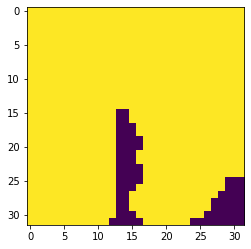

In [9]:
model.evaluate(X_test, Y_train, verbose =1)
Y_pred = []
Y_pred = np.argmax(model.predict(X_test), axis=-1)
print()
print()
print(X_test.shape)
plt.imshow(X_test[5].reshape(32,32))
print ("The predictions for given X_test:")
print (Y_pred)